In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("/content/fridge_price_predictor_dataset_real_brands.csv")
dataset.head()

,Brand,Model,Capacity,Energy Rating,Type,Features,Color,Material,Warranty Period,Country of Manufacture,Price,Random Numeric Feature 1,Random Text Feature 2,Irrelevant Category Feature 3
0,Panasonic,Model0,369.0,A++,NaN,NaN,NaN,Stainless Steel,5.0,Germany,1231.0,3984.0,Text0,Category3
1,GE,Model1,619.0,A,Side-by-Side,Smart Connectivity,White,Glass,8.0,Germany,267.0,3155.0,Text1,Category3
2,GE,Model2,309.0,A,Single Door,Ice Dispenser,Black,Stainless Steel,7.0,India,477.0,2218.0,Text2,Category2
3,LG,Model3,662.0,B,Side-by-Side,Ice Dispenser,Gray,Plastic,8.0,India,NaN,4734.0,Text3,Category2
4,Bosch,Model4,533.0,B,Double Door,Water Dispenser,Gray,Plastic,NaN,India,993.0,4259.0,Text4,Category1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          20000 non-null  object 
 1   Model                          19000 non-null  object 
 2   Capacity                       19012 non-null  float64
 3   Energy Rating                  19000 non-null  object 
 4   Type                           19000 non-null  object 
 5   Features                       14226 non-null  object 
 6   Color                          19000 non-null  object 
 7   Material                       19000 non-null  object 
 8   Warranty Period                19000 non-null  float64
 9   Country of Manufacture         19000 non-null  object 
 10  Price                          19000 non-null  float64
 11  Random Numeric Feature 1       19000 non-null  float64
 12  Random Text Feature 2          19000 non-null 

**Observation 1**: There are many null values in our dataset.

In [4]:
dataset.describe()

,Capacity,Warranty Period,Price,Random Numeric Feature 1
count,19012.000000,19000.000000,19000.000000,19000.000000
mean,447.283032,5.022842,1099.181684,2994.733263
std,207.008095,2.575806,518.876706,1152.089268
min,-99.000000,1.000000,200.000000,1000.000000
25%,272.000000,3.000000,649.000000,1990.750000
50%,449.000000,5.000000,1099.000000,2987.000000
75%,626.000000,7.000000,1552.000000,3982.250000
max,799.000000,9.000000,1999.000000,4999.000000


In [5]:
dataset["Brand"].value_counts()

,count
Brand,
GE,2052
Frigidaire,2050
LG,2003
Siemens,1982
Haier,1978
Samsung,1976
Whirlpool,1962
Bosch,1945
Panasonic,1929


In [6]:
dataset["Model"].value_counts()

,count
Model,
Model0,1
Model13352,1
Model13350,1
Model13349,1
Model13348,1
...,...
Model6687,1
Model6686,1
Model6685,1


**Observation 2**: The model column has distinct values for each row. Therefore, it needs to be dropped.

In [7]:
dataset.drop("Model",axis=1,inplace=True)

In [8]:
dataset.columns

Index(['Brand', 'Capacity', 'Energy Rating', 'Type', 'Features', 'Color',
       'Material', 'Warranty Period', 'Country of Manufacture', 'Price',
       'Random Numeric Feature 1', 'Random Text Feature 2',
       'Irrelevant Category Feature 3'],
      dtype='object')

**Observation 3**: The 3 columns at the end are irrelevant and random. Therefore, I am dropping them.

In [9]:
dataset.drop(columns=["Random Numeric Feature 1","Random Text Feature 2","Irrelevant Category Feature 3"],inplace=True)

In [10]:
dataset.isnull().sum()

,0
Brand,0
Capacity,988
Energy Rating,1000
Type,1000
Features,5774
Color,1000
Material,1000
Warranty Period,1000
Country of Manufacture,1000
Price,1000


In [11]:
#Filling missing values
dataset["Capacity"].fillna(dataset["Capacity"].median(),inplace=True)

In [12]:
dataset["Energy Rating"].fillna(dataset["Energy Rating"].mode()[0],inplace=True)

In [13]:
dataset["Type"].value_counts()

,count
Type,
Single Door,6429
Side-by-Side,6308
Double Door,6263


In [14]:
dataset["Type"].fillna(dataset["Type"].mode()[0],inplace=True)

In [15]:
dataset["Features"].value_counts(dropna=False)

,count
Features,
NaN,5774
Smart Connectivity,4826
Water Dispenser,4719
Ice Dispenser,4681


In [16]:
dataset["Features"].fillna(dataset["Features"].mode()[0],inplace=True)

In [17]:
dataset["Color"].value_counts()

,count
Color,
Silver,4846
Gray,4735
White,4724
Black,4695


In [18]:
dataset["Color"].fillna(dataset["Color"].mode()[0],inplace=True)

In [19]:
dataset["Material"].value_counts()

,count
Material,
Plastic,6422
Glass,6381
Stainless Steel,6197


In [20]:
dataset["Material"].fillna(dataset["Material"].mode()[0],inplace=True)

In [21]:
dataset["Warranty Period"].value_counts()

,count
Warranty Period,
7.0,2177
6.0,2165
9.0,2133
2.0,2125
4.0,2115
3.0,2086
8.0,2079
5.0,2072
1.0,2048


In [22]:
dataset["Warranty Period"].fillna(dataset["Warranty Period"].mode()[0],inplace=True)

In [23]:
dataset["Country of Manufacture"].value_counts()

,count
Country of Manufacture,
China,4827
USA,4745
India,4721
Germany,4707


In [24]:
dataset["Country of Manufacture"].fillna(dataset["Country of Manufacture"].mode()[0],inplace=True)

In [25]:
dataset["Price"].fillna(dataset["Price"].mode()[0],inplace=True)

In [26]:
dataset.isnull().sum()

,0
Brand,0
Capacity,0
Energy Rating,0
Type,0
Features,0
Color,0
Material,0
Warranty Period,0
Country of Manufacture,0
Price,0


**Observation 4**: All of the missing values have been filled. Median imputation has been used for numerical columns and mode imputation has been used for categorical columns.

In [27]:
#Checking for duplicate values
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(20000, 10)
(20000, 10)


**Observation 5**: There are no duplicate values in our dataset.

In [28]:
dataset.dtypes

,0
Brand,object
Capacity,float64
Energy Rating,object
Type,object
Features,object
Color,object
Material,object
Warranty Period,float64
Country of Manufacture,object
Price,float64


**Observation 6**: The brand column has 10 distinct values and encoding it will produce 9 columns. This will lead to a curse of dimensionality problem.

In [29]:
dataset = dataset.drop("Brand",axis=1)

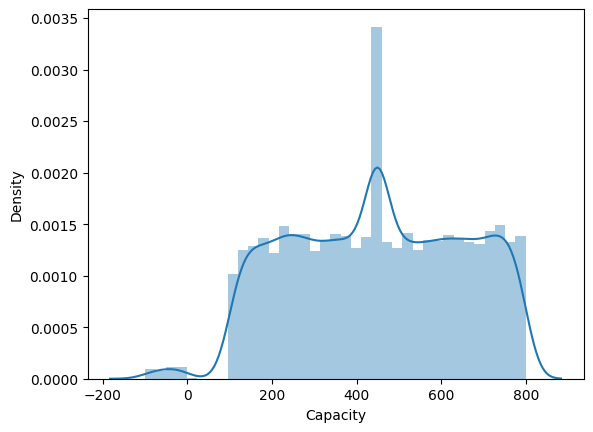

In [30]:
sns.distplot(dataset["Capacity"],kde=True)
plt.show()

In [31]:
dataset["Capacity"].skew()

-0.08143638467976241

In [32]:
dataset["Warranty Period"] = dataset["Warranty Period"].astype(int)

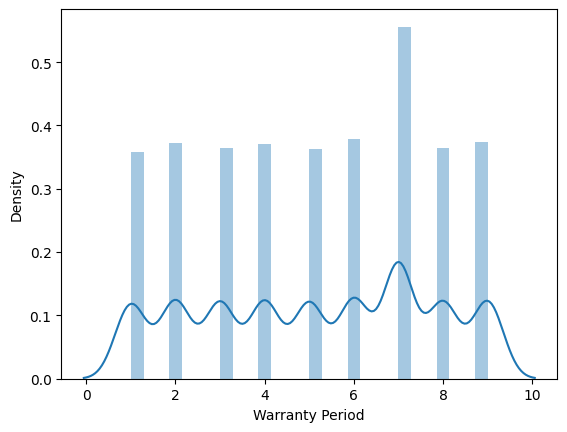

In [33]:
sns.distplot(dataset["Warranty Period"],kde=True)
plt.show()

In [34]:
dataset["Warranty Period"].skew()

-0.10419299859951144

In [35]:
dataset.dtypes

,0
Capacity,float64
Energy Rating,object
Type,object
Features,object
Color,object
Material,object
Warranty Period,int64
Country of Manufacture,object
Price,float64


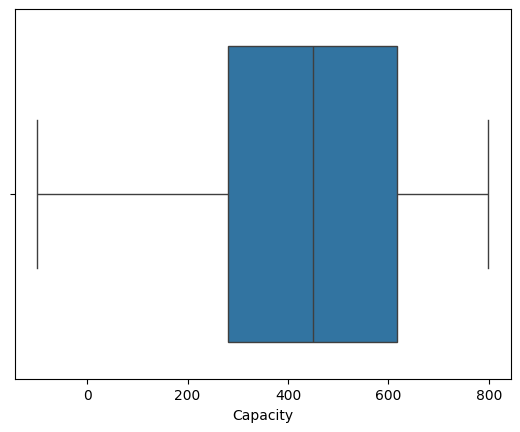

In [36]:
# Outlier Detection in Capacity and Price columns
sns.boxplot(x="Capacity",data=dataset)
plt.show()

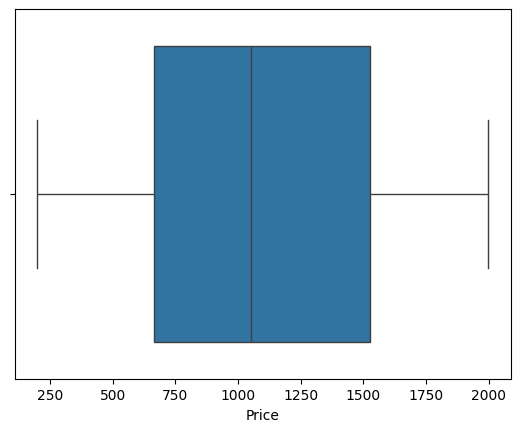

In [37]:
sns.boxplot(x="Price",data=dataset)
plt.show()

**Observation 7**: There are no outliers in capacity and price columns.  

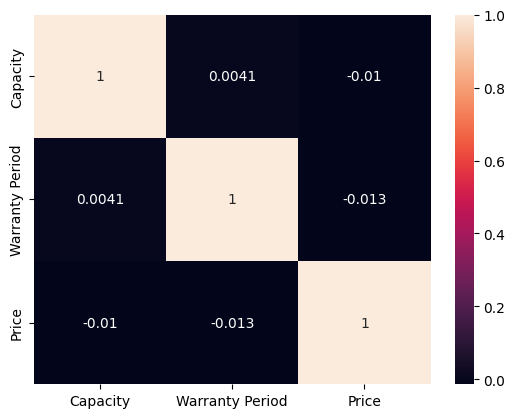

In [38]:
data = dataset[["Capacity","Warranty Period","Price"]]
sns.heatmap(data.corr(),annot=True)
plt.show()

**Observation 8**: There seems to be almost no correlation between price column wrt capacity and warranty period columns. Therefore, we can remove them during feature selection to check whether the result improves or not during evaluation.

In [39]:
n1 = pd.get_dummies(dataset["Energy Rating"],drop_first=True).astype(int)
dataset.drop("Energy Rating",axis=1,inplace=True)

In [40]:
n2 = pd.get_dummies(dataset["Type"],drop_first=True).astype(int)
dataset.drop("Type",axis=1,inplace=True)

In [41]:
n3 = pd.get_dummies(dataset["Features"],drop_first=True).astype(int)
dataset.drop("Features",axis=1,inplace=True)

In [42]:
n4 = pd.get_dummies(dataset["Color"],drop_first=True).astype(int)
dataset.drop("Color",axis=1,inplace=True)

In [43]:
n5 = pd.get_dummies(dataset["Material"],drop_first=True).astype(int)
dataset.drop("Material",axis=1,inplace=True)

In [44]:
n6 = pd.get_dummies(dataset["Country of Manufacture"],drop_first=True).astype(int)
dataset.drop("Country of Manufacture",axis=1,inplace=True)

In [45]:
final_data = pd.concat([dataset.reset_index(drop=True), n1.reset_index(drop=True),
                        n2.reset_index(drop=True), n3.reset_index(drop=True),
                        n4.reset_index(drop=True), n5.reset_index(drop=True),
                        n6.reset_index(drop=True)], axis=1)

In [46]:
final_data.isnull().sum()

,0
Capacity,0
Warranty Period,0
Price,0
A+,0
A++,0
B,0
Side-by-Side,0
Single Door,0
Smart Connectivity,0
Water Dispenser,0


In [47]:
x = final_data.drop("Price",axis=1)
y = final_data[["Price"]]

In [48]:
#Standardising x and y columns
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [49]:
ss.fit(y)
y = pd.DataFrame(ss.transform(y),columns=y.columns)

In [50]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
test_RMSE = MSE(y_test,y_test_pred) **(1/2)
train_RMSE = MSE(y_train,y_train_pred) **(1/2)
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)
print("Test RMSE is: ",test_RMSE)
print("Train RMSE is: ",train_RMSE)
print("R2 score for test is ",r2_test)
print("R2 score for train is ",r2_train)

Test RMSE is:  1.0063289712541927
Train RMSE is:  0.9978218300454216
R2 score for test is  -0.0015092756861525558
R2 score for train is  0.0014929363563623843


In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
y_test_pred = rfr.predict(x_test)
y_train_pred = rfr.predict(x_train)
test_accuracy = MSE(y_test,y_test_pred) **(1/2)
train_accuracy = MSE(y_train,y_train_pred) **(1/2)
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)
print("Test RMSE is: ",test_accuracy)
print("Train RMSE is: ",train_accuracy)
print("R2 score for test is ",r2_test)
print("R2 score for train is ",r2_train)

Test RMSE is:  1.0450107366349601
Train RMSE is:  0.38819253187850766
R2 score for test is  -0.07998203025461392
R2 score for train is  0.8488738942321963


In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model = Sequential()
model.add(Dense(70,activation="relu",input_dim=17))
model.add(Dense(60,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="linear"))

model.compile(loss="mean_squared_error",optimizer="Adam")
model.fit(x_train,y_train,epochs=100)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
test_accuracy = MSE(y_test,y_test_pred) **(1/2)
train_accuracy = MSE(y_train,y_train_pred) **(1/2)
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)
print("Test RMSE is: ",test_accuracy)
print("Train RMSE is: ",train_accuracy)
print("R2 score for test is ",r2_test)
print("R2 score for train is ",r2_train)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0173
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9901
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0088
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9864
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9916
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9948
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9956
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9842
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9790
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9808
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9680
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9573
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9721
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9431
Epoch 15/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2

**Final Comments**: The results have been far from satisfactory. I did try many combinations with the features but the R2 score never really improved. Maybe the dataset is such that the results are bound to remain the same. Additional features and data would be required to get a better idea.